In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import jsm_halopull
import jsm_prephalo
import jsm_stats

In [3]:
example = jsm_halopull.Realizations("../../data/40_cross_host_8/", 1e8)

In [4]:
example.grab_mass("acc", Nhalo=22000) # grabbing only the relevant mass values!

example.grab_mass("acc_surv", Nhalo=22000)

example.grab_mass("surv", Nhalo=22000)

number of realizations: 40
number of branches/subhalos: 22000
saving to numpy files to the same directory
number of realizations: 40
number of branches/subhalos: 22000
saving to numpy files to the same directory
number of realizations: 40
number of branches/subhalos: 22000
saving to numpy files to the same directory


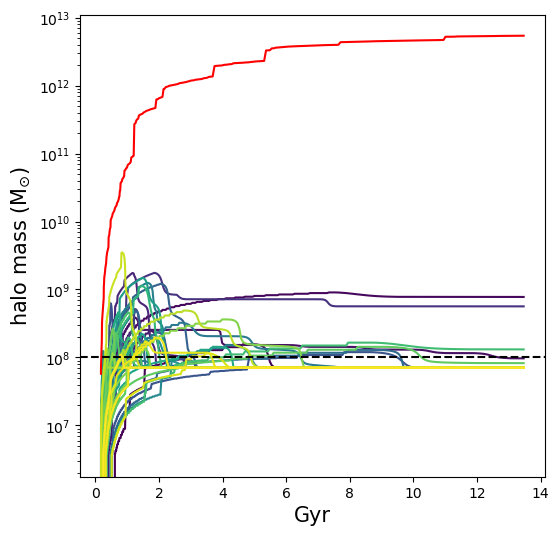

In [5]:
example.plot_single_realization(nhalo=50)

In [6]:
wow = np.load("../../data/40_cross_host_8/acc_surv_mass.npy")

In [7]:
wow.shape


(40, 22000)

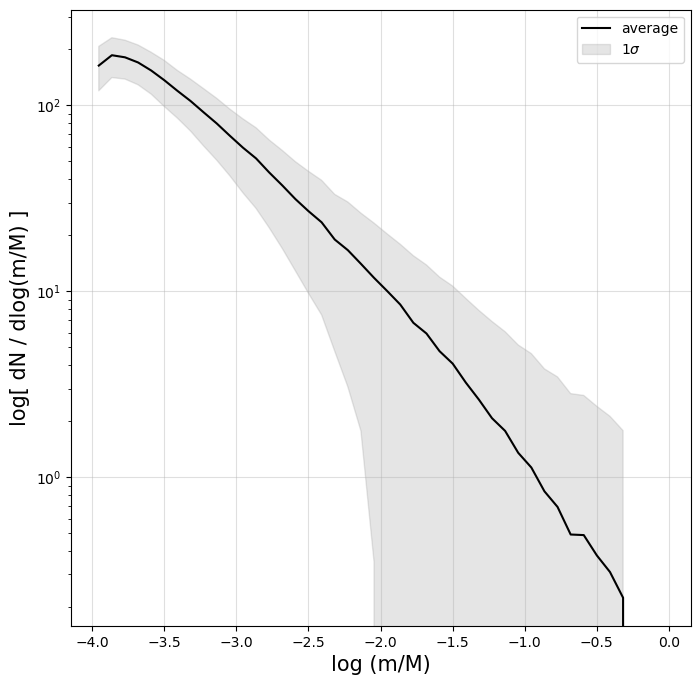

(3129, 168)

In [8]:
massmat = jsm_prephalo.MassMat("../../data/3000_12_8/acc_surv_mass.npy", phimin=-4) # plotting several different mass functions

massmat.prep_data(includenan=False)

massmat.SHMF()

massmat.plot_SHMF()

massmat.SHMR()    

massmat.lgMs.shape

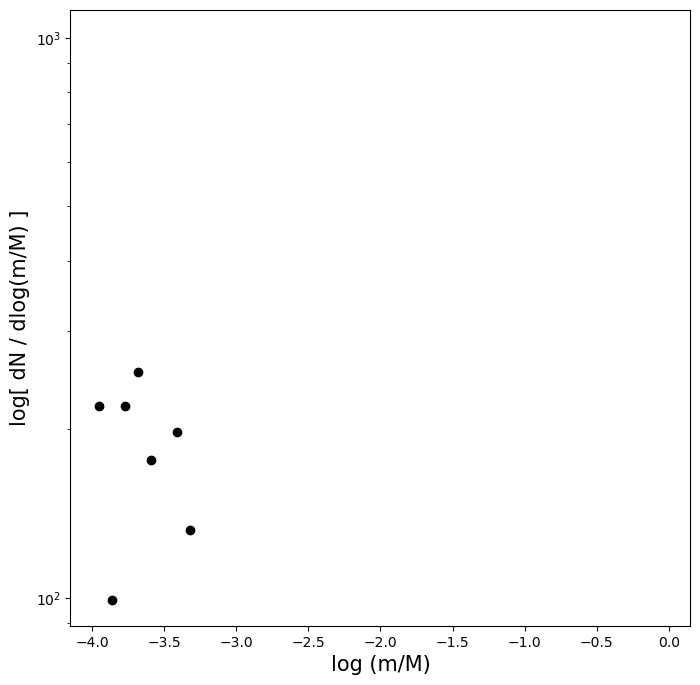

In [45]:
massmat.SHMF_counts
plt.figure(figsize=(8,8))

plt.scatter(massmat.phi_bincenters, massmat.SHMF_counts[5], color="black")
plt.yscale("log")
plt.xlabel("log (m/M)", fontsize=15)
plt.ylabel("log[ dN / dlog(m/M) ]", fontsize=15)
plt.show()

In [13]:
stat = jsm_stats.SatStats(massmat.lgMs)

stat.SAGA_break(Nsamp=100)

stat.CSMF()

dividing your sample into 31 sets 29 were discarded
dividing your sample into 30 sets


Text(0.5, 0, 'log m$_{*}$ (M$_\\odot$)')

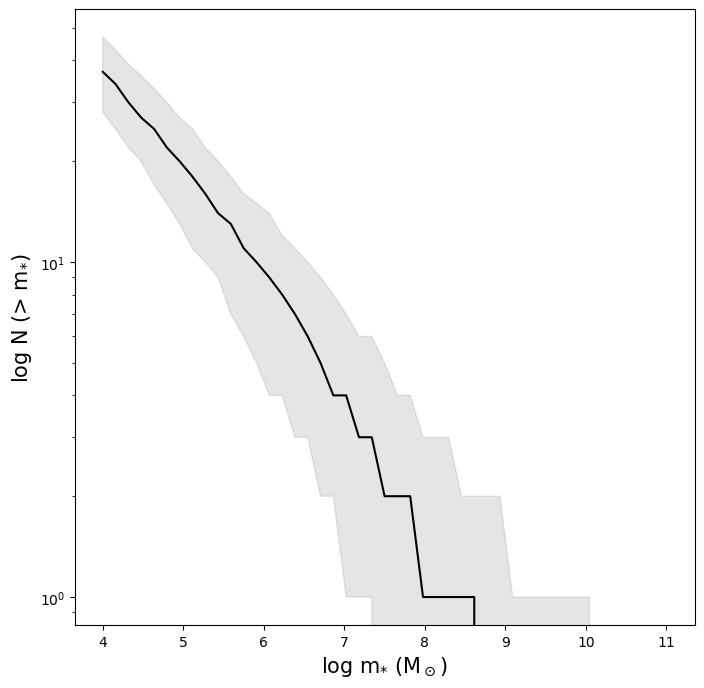

In [36]:
plt.figure(figsize=(8,8))
# for i in stat.CSMF_counts[0:100]:
#     plt.plot(stat.mass_bins, i, alpha=0.3)
plt.yscale("log")
plt.plot(stat.mass_bins, stat.quant[1], label="median", color="black")
plt.fill_between(stat.mass_bins, y1=stat.quant[0], y2=stat.quant[2], alpha=0.2, color="grey", label="5% - 95%")
plt.ylabel("log N (> m$_{*}$)", fontsize=15)
plt.xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)

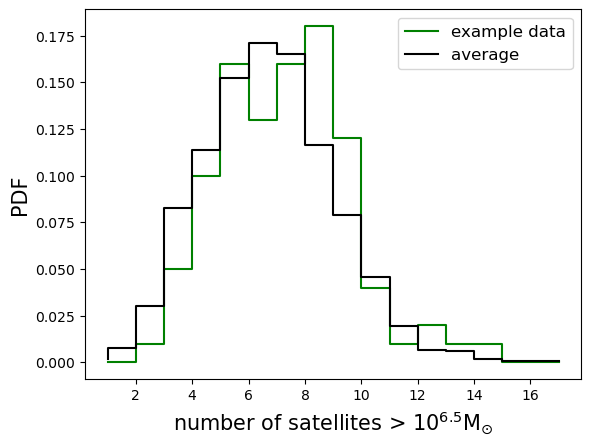

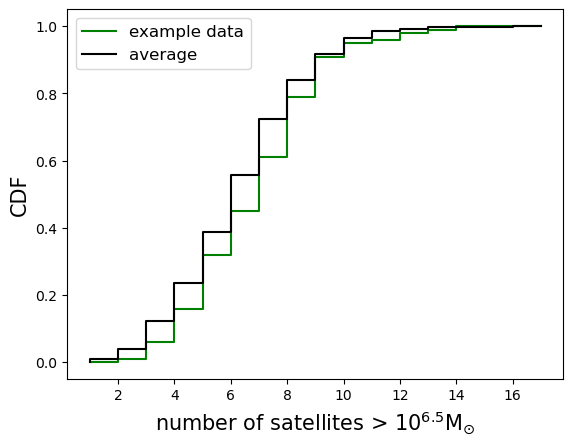

In [10]:
stat.satfreq(6.5)

stat.plot_satfreq()

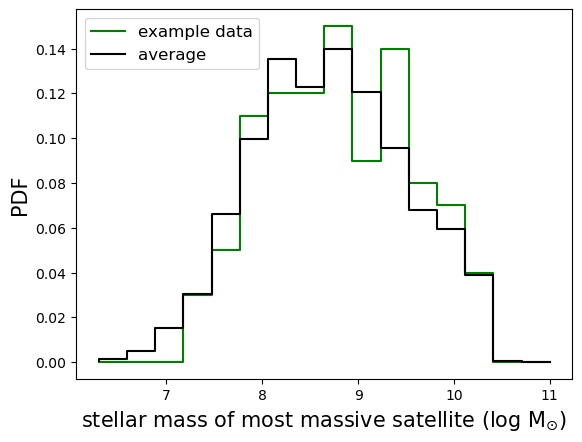

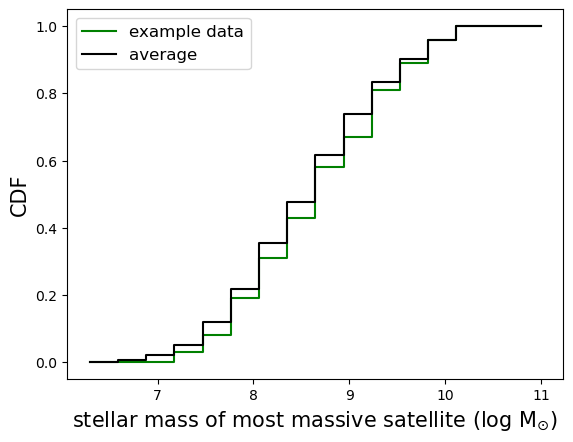

In [11]:
stat.maxsatmass()

stat.plot_maxsatmass()